NetworkXError: Node 'Input Layer\n(2 Neurons)' has no position.

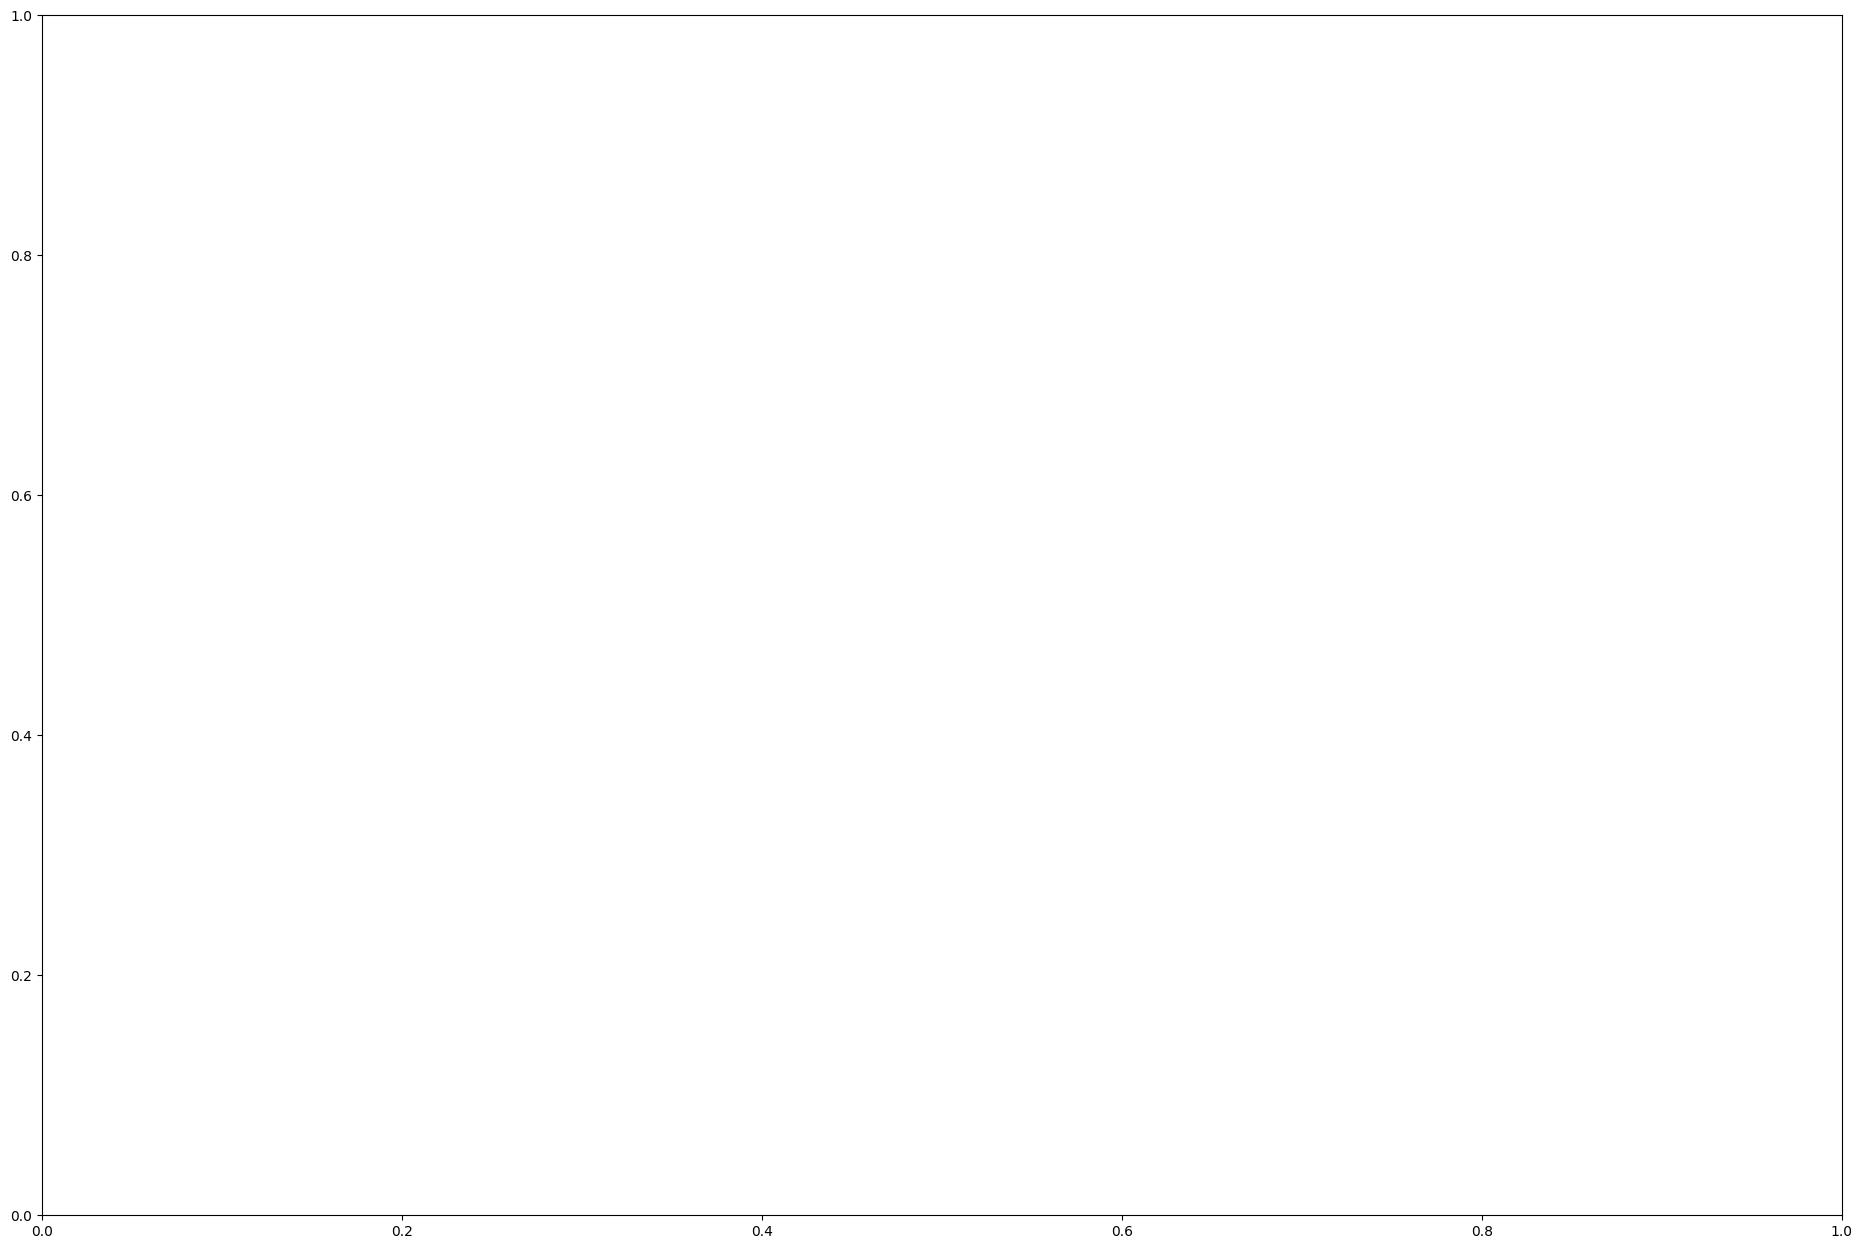

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
layer_positions = {
    "Input Layer\n(2 Neurons)\n([x,y])": (0, 5),
    "Feature Mapping Layer\n(128 Neurons)": (1, 5),
    "Hidden Layer 1\n(64 Neurons)": (2, 5),
    "Hidden Layer 2\n(64 Neurons)": (3, 5),
    "Hidden Layer 3\n(64 Neurons)": (4, 5),
    "Hidden Layer 4\n(64 Neurons)": (5, 5),
    "Hidden Layer 5\n(64 Neurons)": (6, 5),
    "Output Layer\n(3 Neurons)\n([u,v,P])": (7, 5),
}

# Add edges between nodes
edges = [
    ("Input Layer\n(2 Neurons)", "Feature Mapping Layer\n(128 Neurons)"),
    ("Feature Mapping Layer\n(128 Neurons)", "Hidden Layer 1\n(64 Neurons)"),
    ("Hidden Layer 1\n(64 Neurons)", "Hidden Layer 2\n(64 Neurons)"),
    ("Hidden Layer 2\n(64 Neurons)", "Hidden Layer 3\n(64 Neurons)"),
    ("Hidden Layer 3\n(64 Neurons)", "Hidden Layer 4\n(64 Neurons)"),
    ("Hidden Layer 4\n(64 Neurons)", "Hidden Layer 5\n(64 Neurons)"),
    ("Hidden Layer 5\n(64 Neurons)", "Output Layer\n(3 Neurons)"),
]

# Add nodes and edges to the graph
for layer, pos in layer_positions.items():
    G.add_node(layer, pos=pos)

G.add_edges_from(edges)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, node_size=10000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=50)
plt.title("Neural Network Layers for PINN")
plt.show()


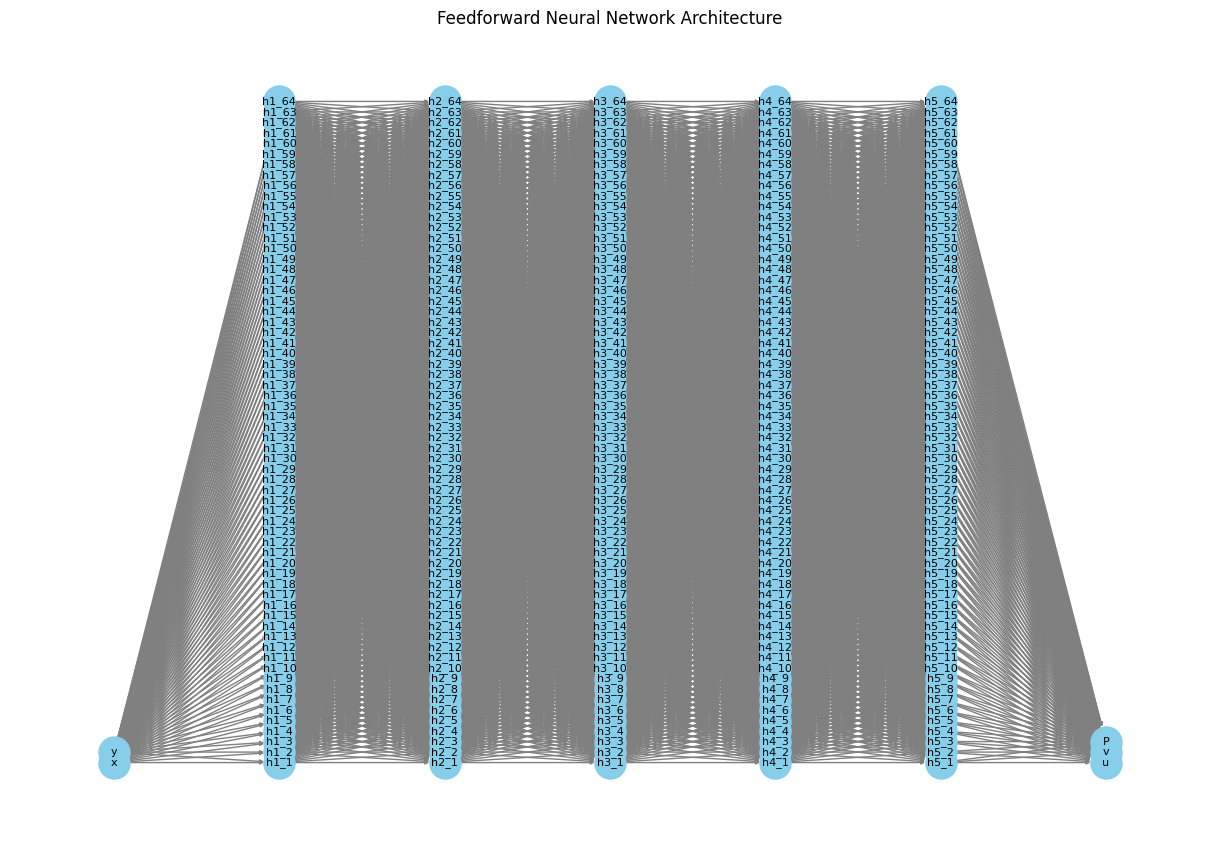

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the structure of the neural network
input_layer = ['x', 'y']
hidden_layers = [
    [f'h1_{i}' for i in range(1, 65)],
    [f'h2_{i}' for i in range(1, 65)],
    [f'h3_{i}' for i in range(1, 65)],
    [f'h4_{i}' for i in range(1, 65)],
    [f'h5_{i}' for i in range(1, 65)],
]
output_layer = ['u', 'v', 'P']

# Initialize the graph
G = nx.DiGraph()

# Add nodes for input, hidden, and output layers
G.add_nodes_from(input_layer, layer='input')
for i, layer in enumerate(hidden_layers, start=1):
    G.add_nodes_from(layer, layer=f'hidden_{i}')
G.add_nodes_from(output_layer, layer='output')

# Add edges between layers
for i in range(len(hidden_layers) + 1):
    if i == 0:
        layer1 = input_layer
    else:
        layer1 = hidden_layers[i-1]
    
    if i < len(hidden_layers):
        layer2 = hidden_layers[i]
    else:
        layer2 = output_layer
    
    for node1 in layer1:
        for node2 in layer2:
            G.add_edge(node1, node2)

# Define the position of each node
pos = {}
layer_dist = 1
node_dist = 1

for i, node in enumerate(input_layer):
    pos[node] = (0, i * node_dist)

for i, layer in enumerate(hidden_layers, start=1):
    for j, node in enumerate(layer):
        pos[node] = (i * layer_dist, j * node_dist)

for i, node in enumerate(output_layer):
    pos[node] = ((len(hidden_layers) + 1) * layer_dist, i * node_dist)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, node_color='skyblue', arrowsize=5, edge_color='gray')
plt.title('Feedforward Neural Network Architecture')
plt.show()
